In [1]:
!pip install mediapipe matplotlib gradio opencv-python

     |████████████████████████████████| 31.1 MB 632 kB/s eta 0:00:01
  Using cached matplotlib-3.4.3-cp37-cp37m-macosx_10_9_x86_64.whl (7.2 MB)
     |████████████████████████████████| 3.4 MB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 42.6 MB 470 kB/s eta 0:00:01
  Using cached numpy-1.21.2-cp37-cp37m-macosx_10_9_x86_64.whl (16.9 MB)
  Using cached attrs-21.2.0-py2.py3-none-any.whl (53 kB)
  Using cached absl_py-0.13.0-py3-none-any.whl (132 kB)
     |████████████████████████████████| 51.4 MB 2.8 MB/s eta 0:00:01
  Using cached wheel-0.37.0-py2.py3-none-any.whl (35 kB)
     |████████████████████████████████| 1.0 MB 2.5 MB/s eta 0:00:01
  Using cached kiwisolver-1.3.2-cp37-cp37m-macosx_10_9_x86_64.whl (61 kB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
     |████████████████████████████████| 3.0 MB 1.2 MB/s eta 0:00:01
Processing /Users/vivek/Library/Caches/pip/wheels/13/e4/6c/e8059816e86796a597c6

In [2]:
import cv2
import mediapipe as mp 
import numpy as np 

In [5]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    cv2.imshow('Segmentation frame', frame)
    
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

In [24]:
mp_selfie = mp.solutions.selfie_segmentation

In [25]:
cap = cv2.VideoCapture(0)
with mp_selfie.SelfieSegmentation(model_selection=0) as model:
    while cap.isOpened():
        ret, frame = cap.read()
        
        
        frame.flags.writeable = False
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        res = model.process(frame)
        frame.flags.writeable = True
        
        
        cv2.imshow('Segmentation frame', frame)

        if cv2.waitKey(10) & 0xFF==ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

In [26]:
res.segmentation_mask

array([[3.59353996e-28, 3.59353996e-28, 3.59353996e-28, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.59617469e-24, 8.59617469e-24, 8.59617469e-24, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00284877e-22, 1.00284877e-22, 1.00284877e-22, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.12255558e-21, 1.12255558e-21, 1.12255558e-21, ...,
        5.39672029e-18, 5.39672029e-18, 5.39672029e-18],
       [1.77565587e-21, 1.77565587e-21, 1.77565587e-21, ...,
        8.50784294e-18, 8.50784294e-18, 8.50784294e-18],
       [1.83689894e-21, 1.83689894e-21, 1.83689894e-21, ...,
        8.79958127e-18, 8.79958127e-18, 8.79958127e-18]], dtype=float32)

In [27]:
from matplotlib import pyplot as plt 
from matplotlib import gridspec


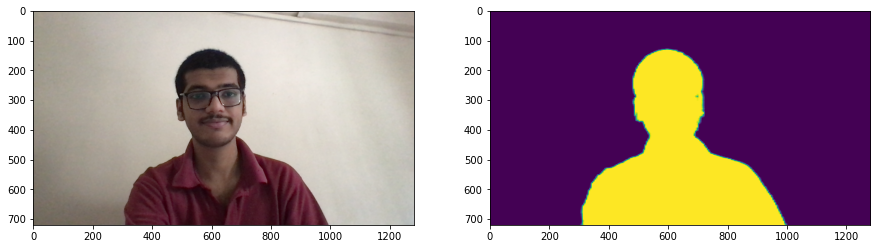

In [28]:
plt.figure(figsize=(15, 15))
grid = gridspec.GridSpec(1,2)

ax0 = plt.subplot(grid[0])
ax1 = plt.subplot(grid[1])

ax0.imshow(frame)
ax1.imshow(res.segmentation_mask)
plt.show()

In [29]:
background = np.zeros(frame.shape, dtype = np.uint8)
mask = np.stack((res.segmentation_mask,)*3, axis = -1)>0.5


In [50]:
mask[0].shape

(1280, 3)

In [30]:
segmented_image = np.where(mask, frame, background)

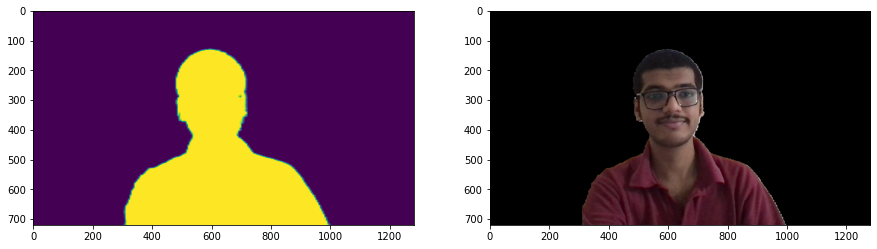

In [31]:
plt.figure(figsize=(15, 15))
grid = gridspec.GridSpec(1,2)

ax0 = plt.subplot(grid[0])
ax1 = plt.subplot(grid[1])

ax0.imshow(res.segmentation_mask)
ax1.imshow(segmented_image)
plt.show()

In [51]:
segmented_image = np.where(mask, cv2.blur(frame, (40,40)), frame)

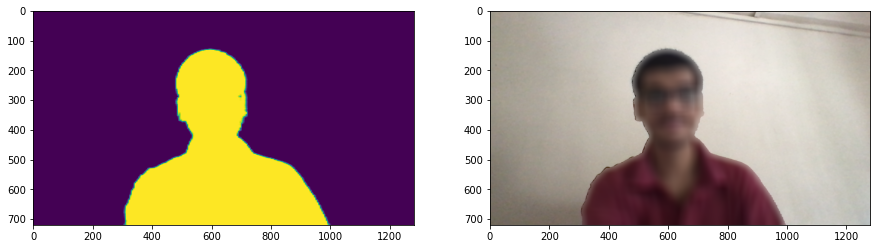

In [52]:
plt.figure(figsize=(15, 15))
grid = gridspec.GridSpec(1,2)

ax0 = plt.subplot(grid[0])
ax1 = plt.subplot(grid[1])

ax0.imshow(res.segmentation_mask)
ax1.imshow(segmented_image)
plt.show()

In [53]:
import gradio as gr 

In [57]:
def segment(image):
    with mp_selfie.SelfieSegmentation(model_selection=0) as model:
        res = model.process(image)
        mask = np.stack((res.segmentation_mask,)*3, axis = -1)>0.5
        return(np.where(mask, cv2.blur(image, (40,40)), image))

In [58]:
webcam = gr.inputs.Image(shape = (640, 480), source = 'webcam')
webapp = gr.interface.Interface(segment, inputs = webcam, outputs='image')

In [59]:
webapp.launch()

Running locally at: http://127.0.0.1:7867/
To create a public link, set `share=True` in `launch()`.
Interface loading below...


(<Flask 'gradio.networking'>, 'http://127.0.0.1:7867/', None)